# Guided Project: Investigating Fandango Movie Ratings

## Introduction

The goal of this project is to analyse more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Walt Hickey's analysis indicating that Fandango's rating system was biased and dishonest.

## Understanding the Data

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis.

- Walt Hickey made the data he analyzed publicly available on GitHub. We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on GitHub and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [25]:
# Read in the dataset fandango_score_comparison.csv

import pandas as pd
fandango = pd.read_csv("fandango_score_comparison.csv")
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [26]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [27]:
# Read in the dataset movie_ratings_16_17.csv

movierating = pd.read_csv("movie_ratings_16_17.csv")
movierating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [28]:
# Isolate the columns that offer information about Fandango's ratings

before = fandango[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]]
before.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
97,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
7,Top Five (2014),4.0,3.5,3223,0.5
55,Black or White (2015),4.5,4.2,1862,0.3
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
34,Aloha (2015),3.5,3.1,2284,0.4


In [29]:
after = movierating[["movie", "year", "fandango"]]
after.sample(5)

,movie,year,fandango
129,Passengers,2016,4.0
19,Beauty and the Beast,2017,4.5
46,Elle,2016,3.5
91,Kong: Skull Island,2017,4.0
12,Arrival,2016,4.0


As our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our population of interest is every movie with a rating on Fandango's website before and after Hickey's analysis.

By reading the README.md files of the two repositories (which can be accessed [here](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and [here](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md), we reach the following conclusions;

- Hickey's sample for analysis is not random as it has to have at least 30 fan reviews on Fandango, and had tickets on sale in 2015.
- The sample for movie ratings analysis is not random as it focused on the most popular movies (with a significant number of votes) released in 2016 and 2017. 

Thus, we can conclude that the 2 samples are not representative of the population we need. 

## Changing the Goal of our Analysis

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it. Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.
Thus, we can change the goal of our analysis to find out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

## Isolating the Samples We Need

With the new goal, we now have two populations that we want to describe and compare with each other:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

The dataset movie_ratings doesn't provide information about the number of fan ratings, so we have to be mindful of representativity issues. A quick way to check whether this sample contains enough popular movies is to do sampling of 10 movies from it and check the number of fan ratings manually on Fandango's websites.

In [52]:
sample10 = after["movie"].sample(10, random_state=1)
sample10

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object

From looking at fan ratings for the above 10 movies, 90% of the movies in the sample are popular, meaning the dataset is representative and contains popular movies.

In [53]:
# Isolate the movies released in 2016

after_analysis = after[after["year"] == 2016].copy()
after_analysis["year"].value_counts()

2016    191
Name: year, dtype: int64

In [60]:
before["Year"] = before["FILM"].str[-5:-1]
before["Year"].value_counts()

<ipython-input-60-c60a133ce43a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before["Year"] = before["FILM"].str[-5:-1]


2015    129
2014     17
Name: Year, dtype: int64

In [57]:
before_analysis = before[before["FILM"].str.contains("2015")].copy()
before_analysis["FILM"].value_counts()

Taken 3 (2015)                   1
Phoenix (2015)                   1
While We're Young (2015)         1
Pixels (2015)                    1
The Last Five Years (2015)       1
                                ..
Escobar: Paradise Lost (2015)    1
Trainwreck (2015)                1
The Gallows (2015)               1
The Gift (2015)                  1
Infinitely Polar Bear (2015)     1
Name: FILM, Length: 129, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

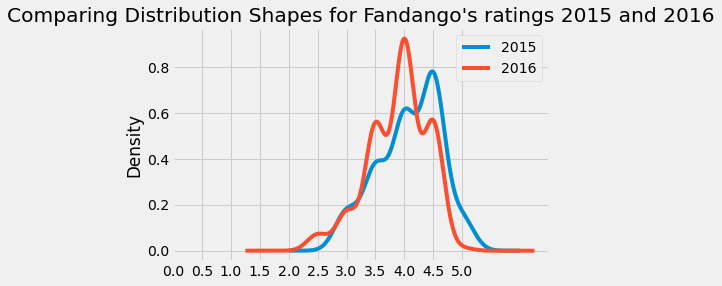

In [73]:
# Create 2 Kernel density estimate plots

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
before_analysis["Fandango_Stars"].plot.kde(label = '2015', legend=True)
after_analysis["fandango"].plot.kde(label = '2016', legend=True)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend()
plt.title('Comparing Distribution Shapes for Fandango\'s ratings 2015 and 2016')
plt.show()

From analysing the two kernal density plots, we noticed the followings:
- The shape of both distributions are similar. High densities are noticed with rating stars from 3.5 to 4.5.
- Distinct differences are more movies receive a 3.5 or 4-star rating in 2016 than in 2015, and less movies receive a 4.5 or 5 star rating in 2016 than in 2015.
The plots also tell us something about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

## Comparing Relative Frequencies

In [74]:
# Generate frequency table for the before_analysis dataset
before_analysis["Fandango_Stars"].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [75]:
# Generate frequency table for the after_analysis dataset
after_analysis["fandango"].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

Since the samples have different number of movies, comparing the two tables using absolute frequencies is not very useful. We'll compute relative frequencies table next.

In [76]:
before_analysis["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [79]:
after_analysis["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can still see the difference between the two distributions as mentioned above. 
In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. Also, the percentage for 5-star rating dropped from nearly 7% to 0.5%. The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. Furthermore, there are higher percentages for 3.5 and 4-star rating in 2016 than in 2015.

##  Determining the Direction of the Change

To see clearly the direction of the difference, we'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics.

In [93]:
# Summary metrics for distribution in 2015

import numpy as np
mean_2015 = before_analysis["Fandango_Stars"].mean()
mean_2016 = after_analysis["fandango"].mean()

median_2015 = before_analysis["Fandango_Stars"].median()
median_2016 = after_analysis["fandango"].median()

mode_2015 = before_analysis["Fandango_Stars"].mode()[0]
mode_2016 = after_analysis["fandango"].mode()[0]

df = pd.DataFrame(np.array([[mean_2015, mean_2016], [median_2015, median_2016], [mode_2015, mode_2016]]),
                   columns=['2015', '2016'])
df.index = ['mean', 'median', 'mode']
df
# Another way to create a dataframe
# summary = pd.DataFrame()
# summary['2015'] = [mean_2015, median_2015, mode_2015]
# summary['2016'] = [mean_2016, median_2016, mode_2016]


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


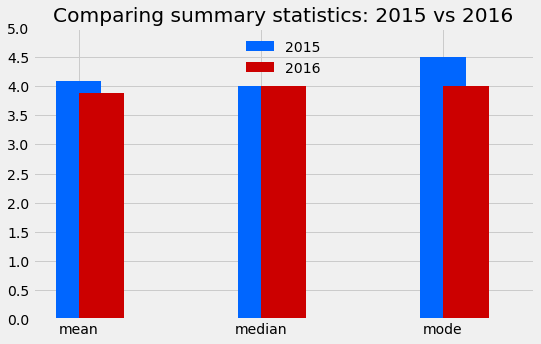

In [116]:
# Generate a grouped bar plot

plt.style.use('fivethirtyeight')
df["2015"].plot.bar(color = '#0066FF', align = 'center', width = .25, label = '2015')
df["2016"].plot.bar(color = '#CC0000', align = 'edge', width = .25, rot = 0, label = '2016', figsize=(8,5))
plt.legend(framealpha = 0, loc='upper center')
plt.yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title('Comparing summary statistics: 2015 vs 2016')
plt.show()

From the grouped bar chart, we arrive at the followings:
- The average rating in 2016 is lower than that in 2015.
- The median is the same for both distributions.
- The most repeated value in 2016 is 4 while in 2015 is 4.5.

Thus, we can confirm that on average, movies in 2016 were rated slightly lower than those in 2015. 

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.The reason for the change is not clear, however, one of the contributing factors might have been Hickey's analysis.